# (Core) Project 1: Global Explanations
- Daniel Barella
- 3/24/23

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
## setting random state for reproducibility
SEED = 42
np.random.seed(SEED)

In [2]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForestRegressor'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
reg = loaded_joblib['RandomForestRegressor']

In [4]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [5]:
len(X_train_df)

6392

In [6]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
y_shap = y_train.loc[X_shap.index]
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3888        15.85         0.110653   36.9506                     2007.0   
2497        15.10         0.087407  221.8456                     1997.0   
7723        17.50         0.015592  184.8266                     2002.0   
8117        10.80         0.049820  243.2144                     2002.0   
7475        15.00         0.044999  140.4838                     2002.0   

      Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
3888                       1.0                     0.0               0.0   
2497                       1.0                     0.0               0.0   
7723                       0.0                     0.0               0.0   
8117                       0.0                     0.0               0.0   
7475                       0.0                     0.0               0.0   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
3888                  0.0               0.0              0.0  ...   
2497                  0.0               0.0              0.0  ...   
7723                  0.0               0.0              0.0  ...   
8117                  0.0               0.0              0.0  ...   
7475                  0.0               0.0              0.0  ...   

      Outlet_Size_MISSING  Outlet_Size_Medium  Outlet_Size_Small  \
3888                  1.0                 0.0                0.0   
2497                  0.0                 0.0                1.0   
7723                  1.0                 0.0                0.0   
8117                  1.0                 0.0                0.0   
7475                  1.0                 0.0                0.0   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
3888                          0.0                          1.0   
2497                          1.0                          0.0   
7723                          0.0                          1.0   
8117                          0.0                          1.0   
7475                          0.0                          1.0   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
3888                          0.0                        0.0   
2497                          0.0                        0.0   
7723                          0.0                        0.0   
8117                          0.0                        0.0   
7475                          0.0                        0.0   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
3888                            1.0                            0.0   
2497                            1.0                            0.0   
7723                            1.0                            0.0   
8117                            1.0                            0.0   
7475                            1.0                            0.0   

      Outlet_Type_Supermarket Type3  
3888                            0.0  
2497                            0.0  
7723                            0.0  
8117                            0.0  
7475                            0.0  

[5 rows x 32 columns]

In [13]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)


In [14]:
explainer = shap.Explainer(reg)
explainer

In [15]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [16]:
X_shap.shape

(400, 32)

In [17]:
shap_values.shape

(400, 32)

In [18]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
0      -1.752966         6.206629 -1651.316898                 -12.401522   
1    -196.893551      -370.498601   636.246852                -268.870853   
2      12.587808        -0.442285   750.458029                 -77.020600   
3    -207.836951      -534.563466  1175.019255                -202.637750   
4      42.800412       -79.844807  -324.509986                -130.897516   
..           ...              ...          ...                        ...   
395  -151.560015      -176.334406   285.418688                -111.117629   
396    64.196734        87.109855    -4.003381                 -54.254130   
397    -7.722405       -23.397303  -432.440050                -149.913524   
398   230.794224       141.263796   588.597559                  28.334539   
399   -59.383706       -34.561147 -1582.053654                 -36.059191   

     Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
0                    4.928713               -1.863679         -0.456742   
1                   -4.508755               -7.425136          2.596369   
2                  -58.478273               -3.218224          0.163464   
3                  -51.148780               -2.603572         -1.867183   
4                   -9.772986               -0.446926          0.045382   
..                        ...                     ...               ...   
395                -30.159936               -4.999489          1.332007   
396                 18.611369               -0.740938         -1.862748   
397                -12.798422               -1.327649         -3.041492   
398                 -1.031110                1.717449         -1.302531   
399                 -4.907927               -1.208958         -0.346672   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
0              -0.978735          0.758011         1.556796  ...   
1              -3.460342         -2.228473         0.061914  ...   
2              -5.329169         -8.572794        -1.420744  ...   
3              -2.040509         -6.366532        10.523474  ...   
4               0.371769         -2.843992         2.870730  ...   
..                   ...               ...              ...  ...   
395            -5.771240         -2.753897        -3.358188  ...   
396            -0.250756         -1.525295         0.593767  ...   
397            -0.862335         -3.810864         1.560244  ...   
398             3.318525         94.891420        20.190436  ...   
399            -0.490851         -1.118571         3.834288  ...   

     Outlet_Size_MISSING  Outlet_Size_Medium  Outlet_Size_Small  \
0               2.345372            0.497556           3.534661   
1             -10.260737          -28.711098         -57.086850   
2             -10.378478          -13.845322           1.628717   
3             -75.934164           -6.274467         -39.123019   
4             -24.904005           -3.497988           3.465047   
..                   ...                 ...                ...   
395           -37.764243          -11.876464         -26.550381   
396            -0.876941            4.209561           3.068110   
397            -2.362531           -2.492480          -8.526661   
398            14.957644            6.686169           4.808565   
399            -1.026153            0.015766           0.632801   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                      -1.253276                     2.564125   
1                     -26.816383                   -21.343239   
2                     -25.963712                    -6.419260   
3                     -23.790354                   -20.506082   
4                       6.648054                     4.059396   
..                           ...                          ...   
395                   -18.609314                   -16.768568   
396                    -4.393118     

In [19]:
import os
os.makedirs("images/", exist_ok=True)

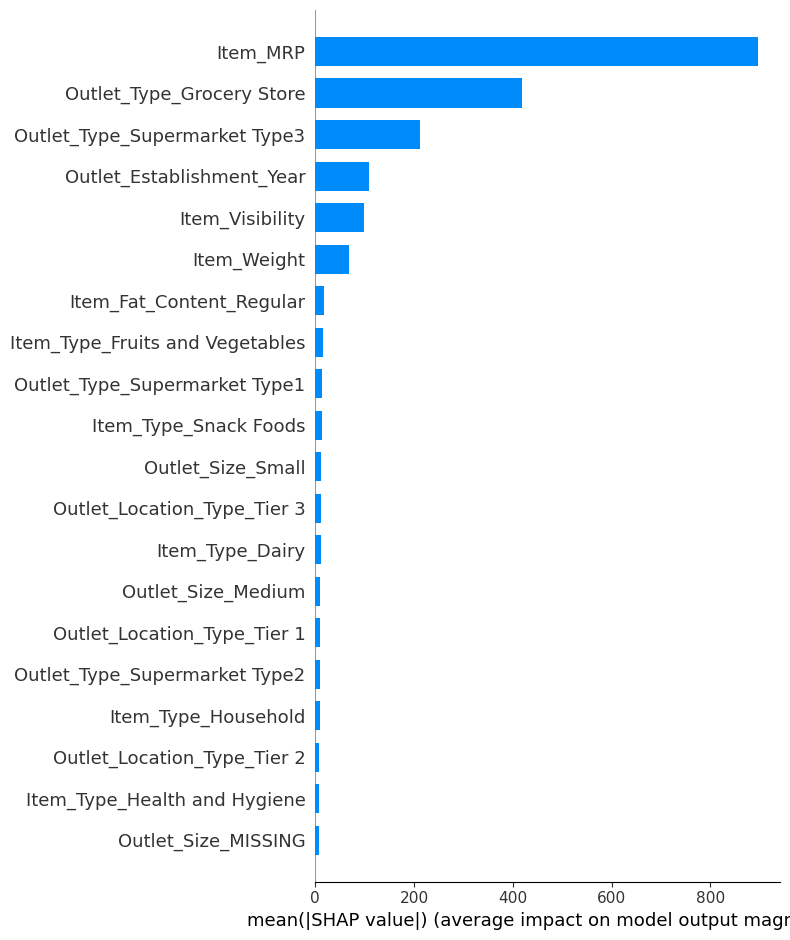

In [20]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap, plot_type='bar')
ax.set_title('Summary Plot - Reg Shap');
fig.savefig('images/summary_plot_reg_shap.png')

![Feature Importance](RandomForestRegressor.png)

- Both show Item_MRP as being the most important feature.
- Outlet_Type_Grocery Store is also coming in as a strong second for both graphs.
- Our original graph shows Item_Visibility in third place, but the shap graph shows us Outlet_Type_Supermarket Type3 in third.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


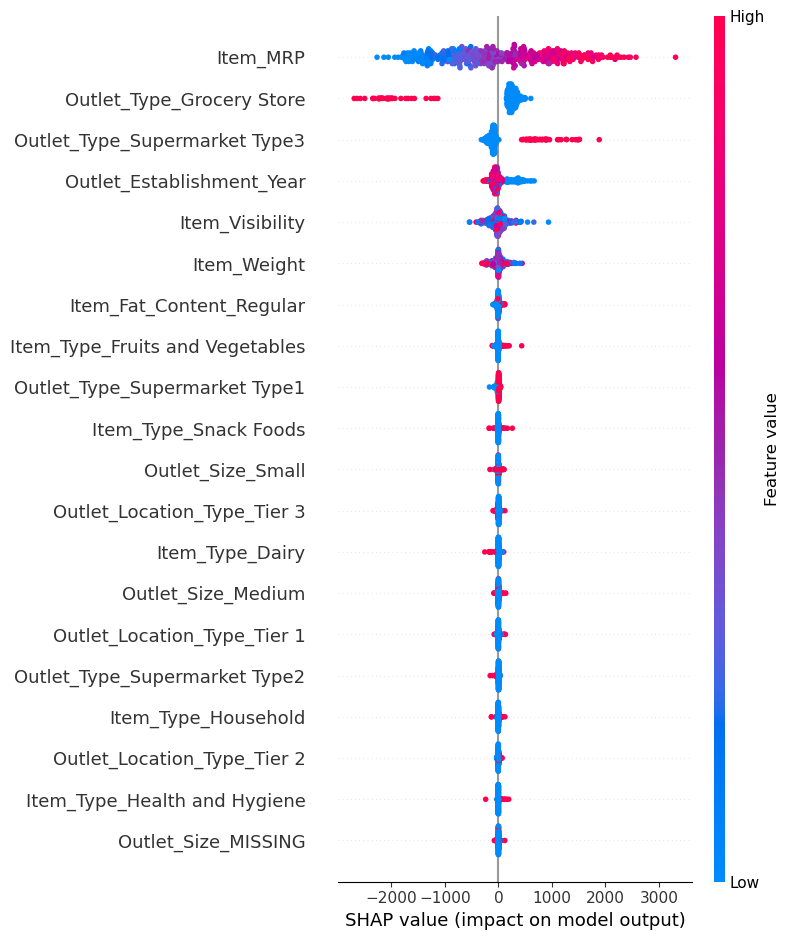

In [21]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap, plot_type='dot')
ax.set_title('Summary Plot - Reg Shap Dot');
fig.savefig('images/summary_plot_reg_shap_dot.png')

- The higher the Item_MRP, the higher the Shap value
- If it is a Outlet_Type_Grocery Store, then it's will have a lower shap value.
- If it is a Outlet_Type_Supermarket Type3 then it is going to positively affect the shap value.

# Local Explanations

In [22]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer = LimeTabularExplainer(
    training_data=X_shap.values,  
    feature_names=X_shap.columns,
    mode='regression'
)

<AxesSubplot: xlabel='Item_MRP', ylabel='Count'>

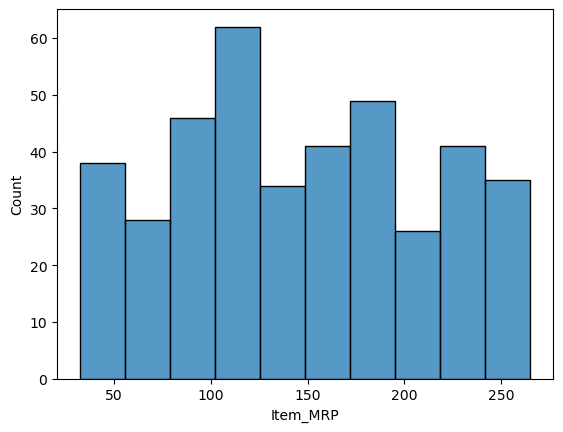

In [23]:
sns.histplot(X_shap['Item_MRP'])

In [24]:
filt_high_Item_MRP = X_shap['Item_MRP'] > 250.0
len(X_shap[filt_high_Item_MRP])

22

- Item_MRP has been the top influencer through all graphs, so it would make sense to break it open and see what makes it tic

In [25]:
idx_examples_filt_high_Item_MRP = X_shap[filt_high_Item_MRP].index
idx_examples_filt_high_Item_MRP

Int64Index([ 64,  80,  86,  89,  94, 127, 132, 133, 138, 171, 194, 205, 231,
            249, 258, 266, 328, 330, 353, 367, 378, 390],
           dtype='int64')

In [27]:
## selecting index of final example
index_number = 64  
# or use np.random.choice(idx_examples_grp_high_Pass)
example_high_Item_MRP = X_shap.loc[index_number]
example_high_Item_MRP

Item_Weight                           7.905000
Item_Visibility                       0.010012
Item_MRP                            250.440800
Outlet_Establishment_Year          1997.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       0.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 1.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Size_L

In [28]:
# Generate the LIME explanation
exp = lime_explainer.explain_instance(example_high_Item_MRP, lin_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but LinearRegression was fitted with feature names


- Outlet_Type_Supermarket Type3 is negative, but the most impactful.
- Item_MRP really pushed this into the positive.
- The fact that this is not a Outlet_Type_Grocery Store, also really helped it into the possitive.

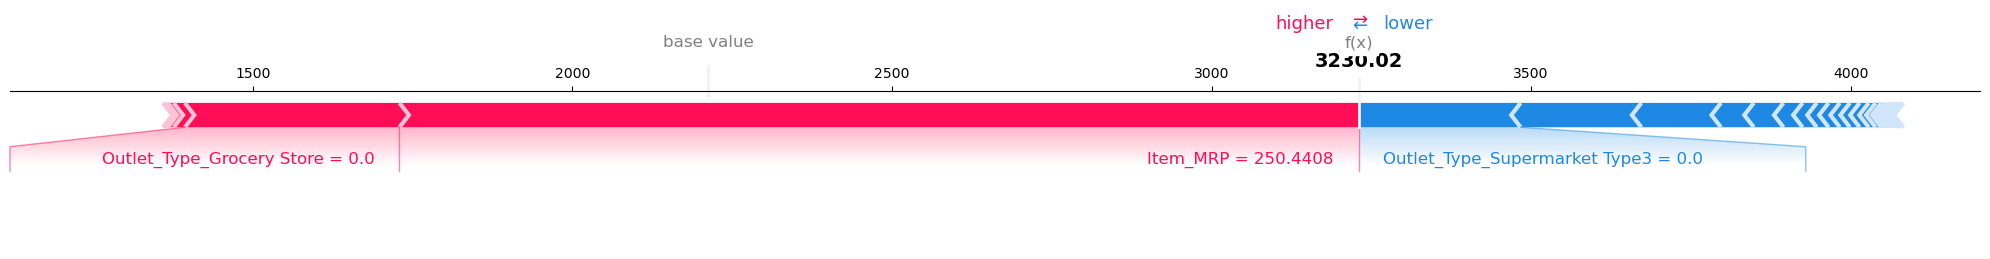

In [32]:
## Individual forceplot
example_high_Item_MRP_force_plot = shap.force_plot(explainer.expected_value,
                shap_values= shap_values[index_number].values,
               features=X_shap.iloc[index_number],
                matplotlib=True, show=False)

example_high_Item_MRP_force_plot.tight_layout()
plt.savefig('example_high_Item_MRP_force_plot.png')
example_high_Item_MRP_force_plot


- You can see from this force plot that the forces of Item_MRP and Outlet_Type_Grocery Store are pushing this individual example way into the positive.

In [34]:
sns.histplot(X_shap['Outlet_Type_Grocery Store'])

<AxesSubplot: xlabel='Outlet_Type_Grocery Store', ylabel='Count'>

In [35]:
Outlet_Type_Grocery_Store_yes = X_shap['Outlet_Type_Grocery Store'] == 1.0
len(X_shap[Outlet_Type_Grocery_Store_yes])

35

- Outlet_Type_Grocery Store has been in the top 2 a lot, I wanted to see what was pushing it to have such a negative affect on the target

In [36]:
idx_examples_filt_Outlet_Type_Grocery_Store_yes = X_shap[Outlet_Type_Grocery_Store_yes].index
idx_examples_filt_Outlet_Type_Grocery_Store_yes

Int64Index([ 21,  34,  40,  42,  72,  74,  76,  89, 104, 122, 132, 156, 157,
            174, 175, 192, 199, 209, 213, 228, 229, 250, 260, 261, 262, 269,
            285, 291, 297, 312, 332, 359, 371, 373, 380],
           dtype='int64')

In [37]:
## selecting index of final example
index_number = 21  
# or use np.random.choice(idx_examples_grp_high_Pass)
example_Outlet_Type_Grocery_Store_yes = X_shap.loc[index_number]
example_Outlet_Type_Grocery_Store_yes

Item_Weight                           7.075000
Item_Visibility                       0.097661
Item_MRP                            141.812800
Outlet_Establishment_Year          1998.000000
Item_Fat_Content_Regular              0.000000
Item_Type_Baking Goods                0.000000
Item_Type_Breads                      0.000000
Item_Type_Breakfast                   0.000000
Item_Type_Canned                      0.000000
Item_Type_Dairy                       1.000000
Item_Type_Frozen Foods                0.000000
Item_Type_Fruits and Vegetables       0.000000
Item_Type_Hard Drinks                 0.000000
Item_Type_Health and Hygiene          0.000000
Item_Type_Household                   0.000000
Item_Type_Meat                        0.000000
Item_Type_Others                      0.000000
Item_Type_Seafood                     0.000000
Item_Type_Snack Foods                 0.000000
Item_Type_Soft Drinks                 0.000000
Item_Type_Starchy Foods               0.000000
Outlet_Size_L

In [38]:
# Generate the LIME explanation
exp = lime_explainer.explain_instance(example_Outlet_Type_Grocery_Store_yes, lin_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but LinearRegression was fitted with feature names


- Outlet_Type_Supermarket Type3 is the most infulencial, by being negative.
- The second most infulential is Outlet_Type_Grocery Store being that this example is a one, pushes it far into the negative.
- Item_MRP is the third most influential, and being a low number, pushed it negative.

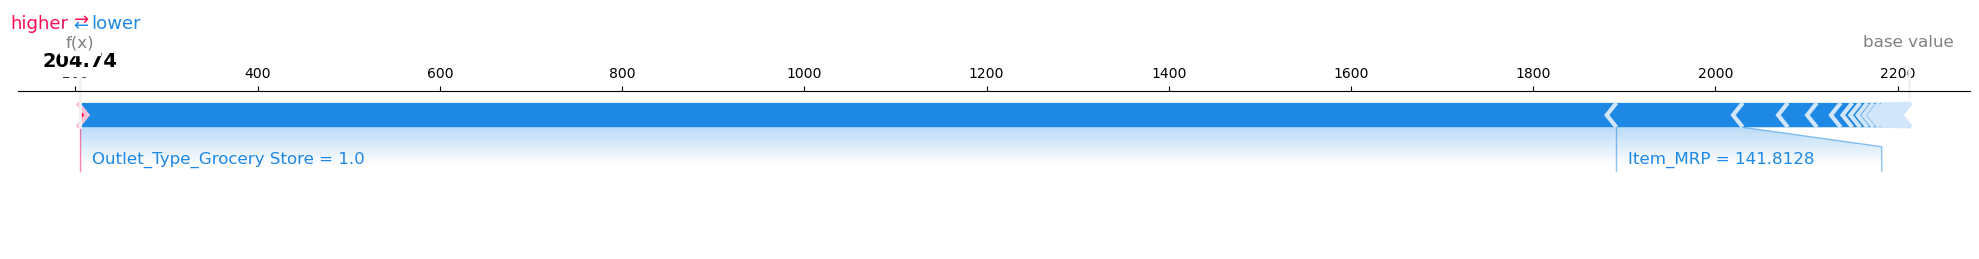

In [40]:
## Individual forceplot
example_Outlet_Type_Grocery_Store_yes_force_plot = shap.force_plot(explainer.expected_value,
                shap_values= shap_values[index_number].values,
               features=X_shap.iloc[index_number],
                matplotlib=True, show=False)

example_Outlet_Type_Grocery_Store_yes_force_plot.tight_layout()
plt.savefig('example_Outlet_Type_Grocery_Store_yes_force_plot.png')
example_Outlet_Type_Grocery_Store_yes_force_plot


- This force plot of an example shows that because this is a Outlet_Type_Grocery Store, and has low Item_MRP, that has pushed this far far into the negative.